In [1]:
from rdkit import Chem
import py3Dmol
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

In [2]:
def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    # viewer.addPropertyLabels("atom","","")

    # for i, at in enumerate(mol):
    #     default = {"stick": {'color': 'black'}}
    #     viewer.setStyle({'model': -1, 'serial': i+1}, at.get("pymol", default))

    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer



In [3]:
mol = Chem.SDMolSupplier('org_2.sdf')[0]
viewer = MolTo3DView(mol, size=(600, 300), style='stick')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

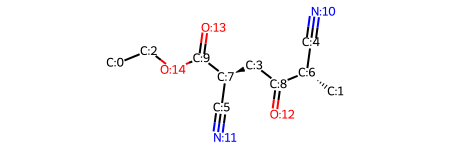

In [4]:
def show_atom_number(mol, label):
    # mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp(label, str(i))
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return mol
show_atom_number(mol, 'molAtomMapNumber')

In [15]:
# smiles_frag = Chem.MolFragmentToSmiles(mol, "[0, 2]")
# frag = Chem.rdmolops.GetMolFrags(mol, atomIndices=[2, 14])[0]
# print(Chem.MolToSmiles(frag))
bond_indices = [1]
bond = mol.GetBondBetweenAtoms(2, 14)
frags = Chem.FragmentOnBonds(mol, [bond.GetIdx()])

In [21]:
frags_lst = Chem.rdmolops.GetMolFrags(frags, asMols=True)

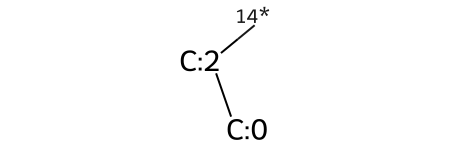

In [22]:
frags_lst[0]

In [33]:
print(Chem.MolToSmiles(mol))
print(Chem.MolToSmiles(frags_lst[0]))
print(Chem.MolToSmiles(frags_lst[1]))

# print(Chem.MolToSmiles(mol, canonical=True))
# print(Chem.MolToSmiles(frags_lst[0]))
# print(Chem.MolToSmiles(frags_lst[1]))

[CH3:0][CH2:2][O:14][C:9]([C@@H:7]([CH2:3][C:8]([C@@H:6]([CH3:1])[C:4]#[N:10])=[O:12])[C:5]#[N:11])=[O:13]
[14*][CH2:2][CH3:0]
[2*][O:14][C:9]([C@@H:7]([CH2:3][C:8]([C@@H:6]([CH3:1])[C:4]#[N:10])=[O:12])[C:5]#[N:11])=[O:13]


In [24]:
viewer = MolTo3DView(frags_lst[0], size=(600, 300), style='stick')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [25]:
viewer = MolTo3DView(frags_lst[1], size=(600, 300), style='stick')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [34]:
SMILES = 'CC(=O)OC1=CC=CC=C1C(=O)O'
mol = Chem.MolFromSmiles(SMILES)
cids = AllChem.EmbedMultipleConfs(mol, numConfs=1, numThreads=8, pruneRmsThresh=0.1, maxAttempts=5, useRandomCoords=False)
AllChem.MMFFOptimizeMoleculeConfs(mol, numThreads=8)
viewer = MolTo3DView(mol, size=(600, 300), style='stick')
viewer.show()

[08:47:22] Molecule does not have explicit Hs. Consider calling AddHs()
[08:47:22] Molecule does not have explicit Hs. Consider calling AddHs()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

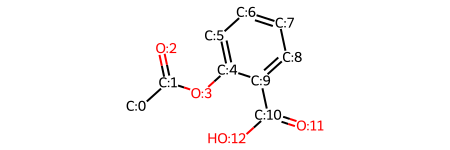

In [35]:
def show_atom_number(mol, label):
    # mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp(label, str(i))
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return mol
show_atom_number(mol, 'molAtomMapNumber')

In [36]:

bond = mol.GetBondBetweenAtoms(1, 3)
frags = Chem.FragmentOnBonds(mol, [bond.GetIdx()])

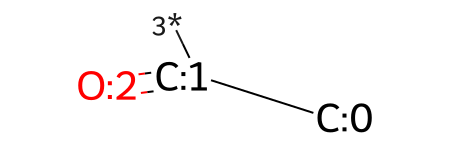

In [41]:
frags_lst = Chem.rdmolops.GetMolFrags(frags, asMols=True)
frags_lst[0]

In [40]:
viewer = MolTo3DView(frags_lst[0], size=(600, 300), style='stick')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [44]:
SMILES = 'CC(=O)OC1=CC=CC=C1C(=O)O'
mol = Chem.MolFromSmiles(SMILES)
bond = mol.GetBondBetweenAtoms(1, 3)
frags = Chem.FragmentOnBonds(mol, [bond.GetIdx()])
frags_lst = Chem.rdmolops.GetMolFrags(frags, asMols=True)
print(Chem.MolToSmiles(mol))
print(Chem.MolToSmiles(frags_lst[0]))
print(Chem.MolToSmiles(frags_lst[1]))

# use gin judge isomorphism(between 2d)
# get 2D frag smiles and 3d coorinates


CC(=O)Oc1ccccc1C(=O)O
[3*]C(C)=O
[1*]Oc1ccccc1C(=O)O


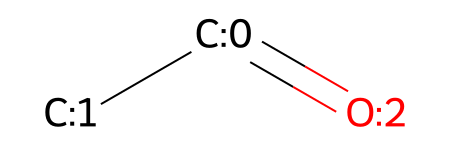

In [46]:
test_mol = Chem.MolFromSmiles('C(C)=O')
show_atom_number(test_mol, 'molAtomMapNumber')